In [111]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont, ImageEnhance

import os

In [119]:
#get the images directory
image_dir = os.getcwd() + '\\images\\finding_waldo'

#get the background and waldo image directory
background_dir = image_dir + '\\wheres_wally.jpg'
waldo_dir = image_dir + '\\waldo.png'
wilma_dir = image_dir + '\\wilma.png'

In [141]:
#create a function to generate images
def generate_sample_image(background, waldo, wilma):
    
    #background image
    background_im = Image.open(background_dir)
    background_im = background_im.resize((500, 350))

    #waldo
    waldo_im = Image.open(waldo_dir)
    waldo_im = waldo_im.resize((60, 100))

    #wilma
    wilma_im = Image.open(wilma_dir)
    wilma_im = wilma_im.resize((60, 100))
    
    #select x and y coordinates randomly we'll select between (0, 430) and (0, 250)
    col = np.random.randint(0, 410)
    row = np.random.randint(0, 230)
    
    #pic randomly between waldo and wilma. If 1 we will select waldo. if 0 we wills elect wilma
    rand_person = np.random.choice([0, 1], p = [0.5, 0.5])
    
    if rand_person == 1:
        
        background_im.paste(waldo_im, (col, row), mask = waldo_im)
        cat = 'Waldo'
        
    else:
        
        background_im.paste(wilma_im, (col, row), mask = wilma_im)
        cat = 'Wilma'
        
    return np.array(background_im).astype('uint8'), (col, row), cat 

In [151]:
def plot_bounding_box(image, gt_coords):
    
    #convert image to array
    image = Image.fromarray(image)    
    draw = ImageDraw.Draw(image)
    draw.rectangle((gt_coords[0], gt_coords[1], gt_coords[0] + 60, gt_coords[1] + 100), outline = 'green', width = 5)
    
    return image

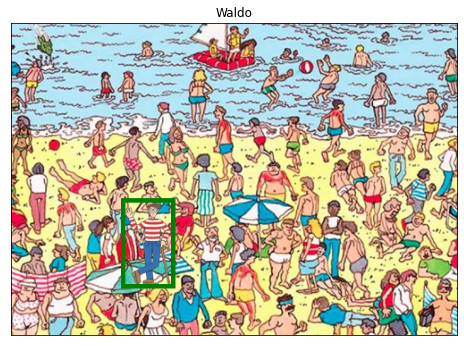

In [168]:
#generate an example image
sample_im, pos, cat = generate_sample_image(background_im, waldo_im, wilma_im)

#get image with bounding box
im = plot_bounding_box(sample_im, pos)

plt.figure(figsize = (8, 8))
plt.imshow(im)
plt.title(cat)
plt.xticks([])
plt.yticks([])
plt.show()


In [ ]:
#function to generate images
